## Problem 5: Simple Linear Regression
\begin{align*}
&\text{ESE402 HW4} \\
&\text{Sheil Sarda <sheils@seas.upenn.edu>}
\end{align*}

In this question, you will implement simple linear regression from scratch. The dataset you will work with is called the Boston data set. You can find more information about the data set here: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html 

You will use the pandas library to load the csv file into a dataframe:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read the csv file and load into a pandas dataframe 
# make sure Boston.csv is in the same file path as this notebook
boston = pd.read_csv('Boston.csv')

In [5]:
# read the above link to learn more about what each of the columns indicate 
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Simple linear regression builds a linear relationship between an input variable $X$ and an output variable $Y$. We can define this linear relationship as follows: 

$$Y = \beta_0 + \beta_1X$$

#### Objective: find the linear relationship between the proportion of non-retail business acres per town (indus) and the full-value property-tax rate per 10,000 dollars (tax)

So our equation will look like:

$$TAX = \beta_0 + \beta_1INDUS$$

Here, the coefficient $\beta_0$ is the intercept, and $\beta_1$ is the scale factor or slope. How do we determine the values of these coefficients? 

There are several different methods to do so, but we will focus on the Ordinary Least Squares (OLS) method. This method minimizes the sum of the squares of the differences between the observed dependent variable and those predicted by the linear function. 

Recall that a residual is the difference between any data point and the line of regression. When we develop a regression model, we want the sum of the residuals squared to be minimized, indicating that the model is a close fit to the data. 

$$RSS = \sum_{i =1}^{n} (y_i - f(x_i))^2$$
$$= \sum_{i =1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2$$

This is the objective function we minimize to find $\beta_0$ and $\beta_1$. 

In [6]:
# set X to 'indus' and y to 'tax'
X = boston['indus']
y = boston['tax']

First, visualize the data by plotting X and y using matplotlib. Be sure to include a title and axis labels. 

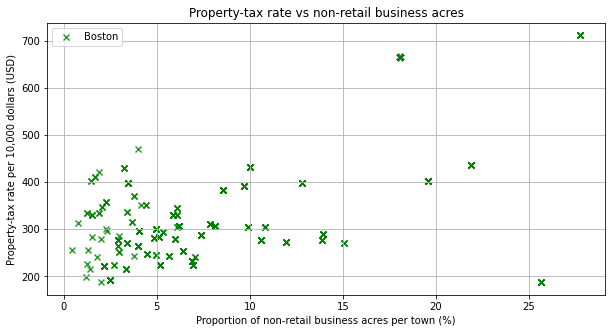

In [7]:
# TODO: display plot
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(X, y, label="Boston", marker='x', alpha=0.8, c='Green')
# TODO: labels and title
plt.title("Property-tax rate vs non-retail business acres")
plt.xlabel("Proportion of non-retail business acres per town (%)")
plt.ylabel("Property-tax rate per 10,000 dollars (USD)")
plt.grid()
plt.legend()
plt.savefig("boston_indus_tax.png")
plt.show()

#### TODO: What do you notice about the relationship between the variables?

A: In general, there is a positive correlation between the proportion of non-retail business acres per town and business taxes. A potential driver for this relationship could be that as the number of businesses in a town increase, the town's need to provide lower taxes as an incentive for companies to operate there and provide employment to the region declines.

Next, find the coefficients. The values for $\beta_0$ and $\beta_1$ are given by the following equations, where $n$ is the total number of values. This derivation was done in class.

\begin{align*}
\beta_1 &= \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} \\
\beta_0 &= \bar{y} - \beta_1\bar{x}
\end{align*}

In [8]:
# TODO: implement function 
def get_coeffs(X, y):
    """
    Params:
        X: the X vector
        y: the y vector
    Returns:
        a tuple (b1, b0)
    """
    X_mean = sum(X) / float(len(X))
    y_mean = sum(y) / float(len(y))
    X_var = sum((X - X_mean)**2)/float(len(X) - 1)

    covariance = 0.0
    for i in range(len(X)):
        covariance += (X[i] - X_mean) * (y[i] - y_mean)
    covariance = covariance / float(len(X) - 1)

    b1 = covariance / X_var
    b0 = y_mean - b1 * X_mean
    return (b1, b0)

In [9]:
# run cell to call function and display the regression line
# the values are rounded for display convenience 
b1, b0 = get_coeffs(X, y)
print("Regression line: TAX = " + str(round(b0)) + " + " + str(round(b1)) +"*INDUS")

Regression line: TAX = 211 + 18*INDUS


Plot the regression line overlayed on the real y-values.

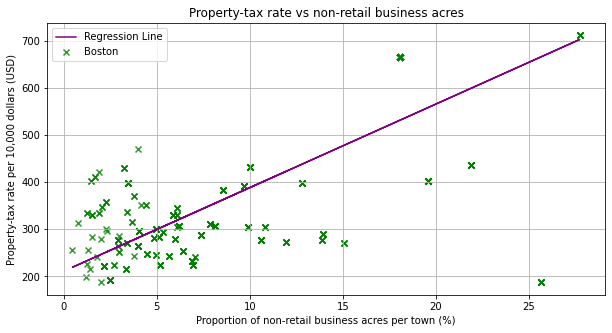

In [10]:
# TODO: plot y-values 
plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(X, y, label="Boston", marker='x', alpha=0.8, c='Green')

# TODO: plot regression line
y_predicted = X*b1 + b0
plt.plot(X, y_predicted, label="Regression Line", c='Purple')

# TODO: labels and title
plt.title("Property-tax rate vs non-retail business acres")
plt.xlabel("Proportion of non-retail business acres per town (%)")
plt.ylabel("Property-tax rate per 10,000 dollars (USD)")
plt.grid()
plt.legend()
plt.show()

The line appears to fit the data, but first, let us find the RSS to evaluate this model. The RSS is used to measure the amount of variance in the data set that is not explained by the regression model. Recall that
$$RSS = \sum_{i =1}^{n} (y_i - (\beta_0 + \beta_1x_i))^2$$

In [11]:
# TODO: implement function
def get_RSS(b0, b1, X, y):
    """
    Params:
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        residual sum of squares (RSS)
    """
    rss = 0.0
    for i in range(len(y)):
        rss += (y[i] - (b0 + b1*X[i]))**2
    return rss

In [12]:
# run this cell to print RSS
print("RSS:", get_RSS(b0, b1, X, y))

RSS: 6892554.224031512


We can also evaluate the model through the Root Mean Squared Error (RMSE) and the Coefficient of Determination ($R^2$ score). 
- The RMSE is similar to the RSS, but provides a value with more interpretable units -- in our case, tax rate per 10,000 dollars.  
- The $R^2$ value represents the proportion of the variance for the dependent variable that is explained by the independent variable. 

Use the following equations to find the RMSE and $R^2$ score:

\begin{align*}
 RMSE &= \sqrt(\sum_{i=1}^{n} \frac{1}{n} (\hat{y_i} - y_i)^2 ) \\
R^2 &= 1 - \frac{SS_r}{SS_t} \\
SS_t &= \sum_{i = 1}^{n} (y_i - \bar{y})^2 \\
SS_r &= \sum_{i=1}^{n} (y_i - \hat{y_i})^2
\end{align*}

In [13]:
# TODO: implement function
def get_RMSE(b0, b1, X, y):
    """
    Params:
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        rmse
    """
    rss = get_RSS(b0, b1, X, y)
    rmse = (rss/len(y))**0.5
    return rmse

In [14]:
# run cell to print RMSE
print("RMSE: ", get_RMSE(b0, b1, X, y))

RMSE:  116.7118188706435


In [15]:
# TODO: implement function
def get_R2(b0, b1, X, y):
    """
    Params:
        b0: beta 0
        b1: beta 1
        X: X vector
        y: y vector
    Returns:
        r2 score
    """
    SS_t = 0.0
    y_mean = sum(y) / float(len(y))
    for i in range(len(y)):
        SS_t += (y[i] - y_mean)**2

    SS_r = get_RSS(b0, b1, X, y)
    r2 = 1 - SS_r / SS_t
    return r2

In [16]:
# run cell to print RMSE
print("R2: ", get_R2(b0, b1, X, y))

R2:  0.5194952370037837


#### Q: Analyze what the above $R^2$ score indicates about the model.

A:  Usually, the larger the R2, the better the regression model fits your observations. In this case, an $R^2$ of 52% implies the model explains 52% of the variation in the response variable around its mean.

A caveat about this metric is that it cannot determine whether the coefficient estimates and predictions are biased, which is why we must also assess residual plots.

Now, we will compare the above results with the results from using scikit-learn, a machine learning library in Python. Read the documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn how to use this library. Return the $R^2$ score and RMSE. 

In [27]:
# TODO: scikit learn function
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def linear_regression_SKL(X, y):
    """
    Params:
        X: X vector
        y: y vector
    Returns:
        rmse and r2 as a tuple
    """
    linear_regression = LinearRegression()
    X_reshaped = np.array(X).reshape(len(X),1)
    linear_regression.fit(X_reshaped, y)
    y_predicted = linear_regression.predict(X_reshaped)

    rmse = mean_squared_error(y, y_predicted, squared=False)
    r2 = r2_score(y, y_predicted)

    return (rmse, r2)

In [28]:
# run this cell to print results from SKL LR
rmse, r2 = linear_regression_SKL(X, y)
print("RMSE: ", rmse)
print("R2: ", r2)

RMSE:  116.71181887064391
R2:  0.5194952370037791


#### Q: Analyze the results and compare the RMSE and $R^2$ to the previous method.

A: Comparing $R^2$ and $RMSE$ of both implementations:

|  Implementation | $R^2$ |  $RMSE$  |
|-|-|-|
|Sci-kit Learn  | 0.5194952370037791 |  116.71181887064391|
|Sheil's Implementation| 0.5194952370037837 | 116.7118188706435 |

This result helps validate our implementation of linear regression, since the two sets of predictions (from sci-kit learn and our own implementation) yield the same scores.